In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

# Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

### Treinamento do Algorítmo

In [22]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

### Previsoes

In [23]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Comparar a base de teste com os registros reais

In [15]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
accuracy_score(y_census_teste, previsoes)
# Percentual de ACERTO

0.8507676560900717

0.8507676560900717

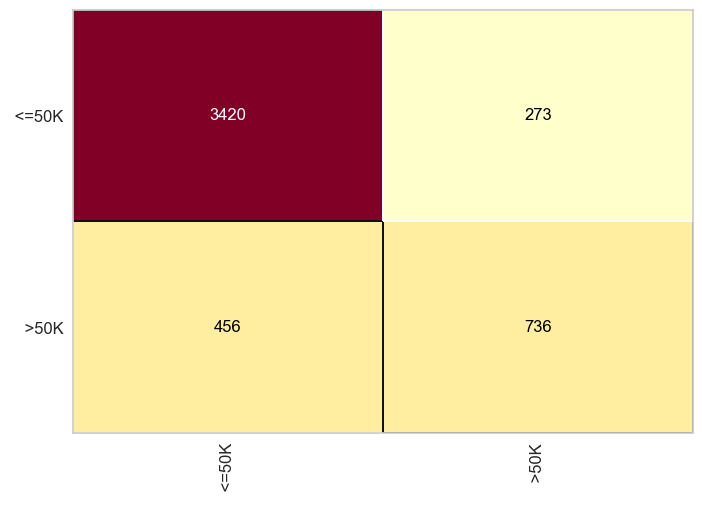

In [25]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [26]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

